In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("data.csv")
print(df.shape[0])
df.head()
x1 = np.array(df.iloc[:,0])
x2 = np.array(df.iloc[:,1])
y = np.array(df.iloc[:,2])

10


In [2]:
def accuracy(b0,b1,b2,x1,x2,y):
    count = 0
    for j in range(10):
        y_pred = b0 + (b1*x1[j]) + (b2*x2[j])
        y_pred = sigmoid(y_pred)
        if y_pred > 0.5:
            y_pred = 1
        else:
            y_pred = 0
        if y[j] == y_pred:
            count = count + 1
    return count/10

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
b0 = 0
b1 = 0
b2 = 0
alpha = 0.1
acc = []
epoch = []
for i in range(5):
    for j in range(10):
        z = b0 + (b1*x1[j]) + (b2*x2[j])
        b0 = b0 - (alpha*(sigmoid(z)-y[j]))
        b1 = b1 - (alpha*(sigmoid(z)-y[j])*x1[j])
        b2 = b2 - (alpha*(sigmoid(z)-y[j])*x2[j])
    acc.append(accuracy(b0,b1,b2,x1,x2,y))
    epoch.append(i+1)

In [5]:
acc

[0.5, 0.5, 0.8, 1.0, 1.0]

**FROM THE OBSERVATION WE GOT AN ACCURACY OF 100% BY THE END OF 4TH EPOCH**

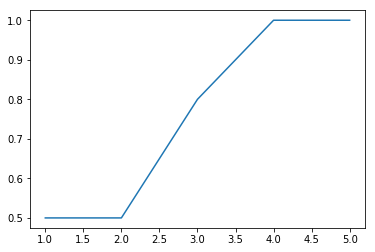

In [6]:
plt.plot(epoch,acc)
plt.show()

**BY OBSERVATION IF WE CHANGE THE EPOCH TO 7 THEN WE CAN SEE A CONSTANT THROGHOUT THE GRAPH FROM 4**

In [13]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(max_iter=50, alpha = 0.1)

In [25]:
x = np.array(df.iloc[:,0:2])
print(x)
sgdc.fit(x, y)

[[ 2.781084  2.550537]
 [ 1.465489  2.362125]
 [ 3.396562  4.400294]
 [ 1.38807   1.85022 ]
 [ 3.064072  3.005306]
 [ 7.627531  2.759262]
 [ 5.332441  2.088627]
 [ 6.922597  1.771064]
 [ 8.675419 -0.24207 ]
 [ 7.673756  3.508563]]


SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=50, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [26]:
ypred = sgdc.predict(x)

In [27]:
print(ypred)
print(y)

[0 0 0 0 0 1 1 1 1 1]
[0 0 0 0 0 1 1 1 1 1]


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred,y)

1.0

**FROM THIS WE CAN VERIFY THAT WE GOT 1 AS ACCURACY AFTER 5 EPOCHS**